# 第12回課題

* 最終課題と同時に提出させていただいています


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./imports-85.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,ohc,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,ohc,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-1,95,volvo,gas,std,four,sedan,rwd,front,ohc,...,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
191,-1,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,...,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
192,-1,95,volvo,gas,std,four,sedan,rwd,front,ohcv,...,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
193,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,ohc,...,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
Y = df["price"]
X = df.iloc[:, 12:25]

In [4]:
X

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
191,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
192,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
193,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [5]:
import seaborn as sns

<AxesSubplot:>

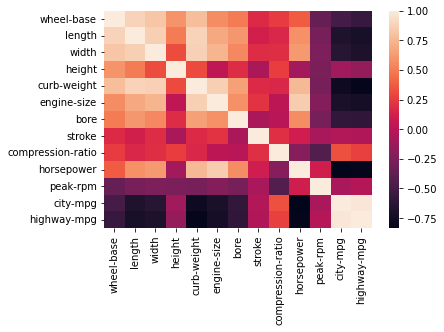

In [6]:
sns.heatmap(X.corr())

In [7]:
X = X.drop(["wheel-base", "width", "curb-weight", "highway-mpg"], axis=1)

In [8]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [9]:
models = [
    ("LinearRegression", LinearRegression, {}, {}),
    ("Lasso", Lasso, {}, {}),
    ("Ridge", Ridge, {}, {}),
    ("KNeighborsRegressor", KNeighborsRegressor, {"n_neighbors": 5}, {}),
    ("KNeighborsRegressor", KNeighborsRegressor, {"n_neighbors": 3}, {}),
    ("SVR(rbf)", lambda **kwargs: SVR(kernel="rbf", **kwargs), {"C": 100, "gamma": 0.1}, {"normalize": True}),
    ("SVR(rbf)", lambda **kwargs: SVR(kernel="rbf", **kwargs), {"C": 200, "gamma": 0.1}, {"normalize": True}),
    ("SVR(rbf)", lambda **kwargs: SVR(kernel="rbf", **kwargs), {"C": 100, "gamma": 0.2}, {"normalize": True}),
    ("SVR(rbf)", lambda **kwargs: SVR(kernel="rbf", **kwargs), {"C": 200, "gamma": 0.2}, {"normalize": True}),
]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
def evaluate_model(model_cls, hyper_params, x, y, iteration=100, normalize=False):
    scores = []
    for _ in range(iteration):
        _model = model_cls(**hyper_params)
        x_train, x_test, y_train, y_test = train_test_split(x, y)
        if normalize:
            x_train, x_test = map(lambda _x: _x / x_train.max(), (x_train, x_test))
            y_train, y_test = map(lambda _y: _y / y_train.max(), (y_train, y_test))
        _model.fit(x_train, y_train)
        scores.append(_model.score(x_test, y_test))
    return np.average(scores)

In [12]:
for name, cls, params, evaluation_params in models:
    score = evaluate_model(cls, params, X, Y, **evaluation_params)
    print(f"{name}({params}): {score}")

LinearRegression({}): 0.7944426395651112
Lasso({}): 0.8028237170166405
Ridge({}): 0.7854572594184798
KNeighborsRegressor({'n_neighbors': 5}): 0.5361873725852487
KNeighborsRegressor({'n_neighbors': 3}): 0.7669505784754982
SVR(rbf)({'C': 100, 'gamma': 0.1}): 0.7662858896153767
SVR(rbf)({'C': 200, 'gamma': 0.1}): 0.7362029932111579
SVR(rbf)({'C': 100, 'gamma': 0.2}): 0.7540662069865097
SVR(rbf)({'C': 200, 'gamma': 0.2}): 0.7574012904966578


In [13]:
model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
model.fit(X_train, Y_train)

LinearRegression()

In [14]:
print(f"回帰式の係数: {model.coef_}")
print(f"回帰式の定数項: {model.intercept_}")

回帰式の係数: [  -12.81364017   438.4804783    134.93569871   492.5889945
 -2128.95275039   306.23806053    44.11144979     2.18401942
   -28.47161588]
回帰式の定数項: -38439.816614579184


In [15]:
print(f"学習用データでのスコア: {model.score(X_train, Y_train)}")
print(f"テスト用データでのスコア: {model.score(X_test, Y_test)}")

学習用データでのスコア: 0.8625298533185919
テスト用データでのスコア: 0.7770459659751928


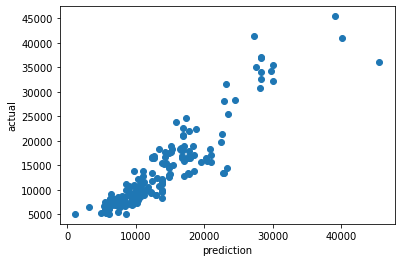

In [16]:
Y_bar = model.predict(X)

plt.scatter(Y_bar, Y)
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()